In [1]:
from datetime import datetime
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

from_beginning = '1987-01-01'
start_date = from_beginning
hsi = yf.download('^HSI', start=start_date)
hsi = hsi[['Adj Close']].copy()
hsi['Return'] = hsi['Adj Close'].pct_change().fillna(0)

# set time here
today = datetime.now()
last_10_years = f'{today.year - 9}-01-01'
last_20_years = f'{today.year - 19}-01-01'
last_30_years = f'{today.year - 29}-01-01'
start_date = f'1900-01-01'
choices = [last_10_years, last_20_years, last_30_years, start_date]

[*********************100%%**********************]  1 of 1 completed


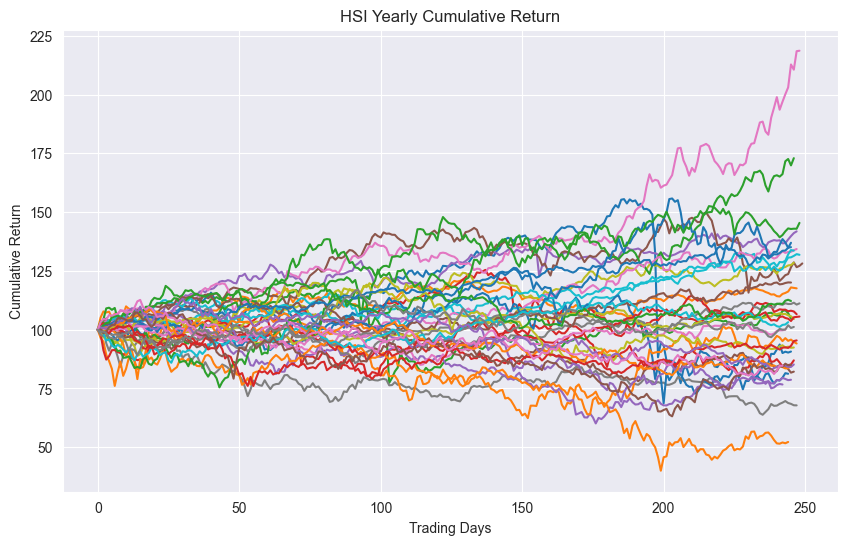

In [2]:
plt.figure(figsize=(10, 6))
for _df in hsi['Adj Close'].groupby(hsi.index.year):
    temp_df = _df[1] / _df[1].iloc[0]
    plt.plot((temp_df * 100).values.tolist())
    plt.ylabel('Cumulative Return')
    plt.xlabel('Trading Days')
    plt.title('HSI Yearly Cumulative Return')

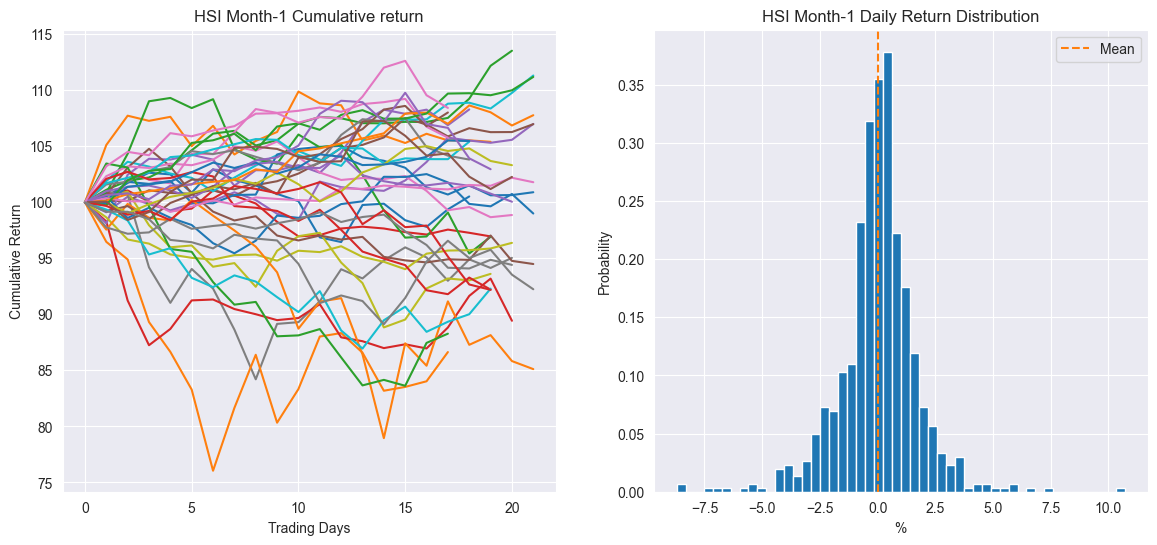

Mean: 0.01721688493433404, Std: 1.7274952251787403
Skewness: -0.15472984570452908, Kurtosis: 5.207379718203007
Jarque-Bera test p-value: 8.757371378211792e-189
p_value < 0.05, the distribution is likely not normal


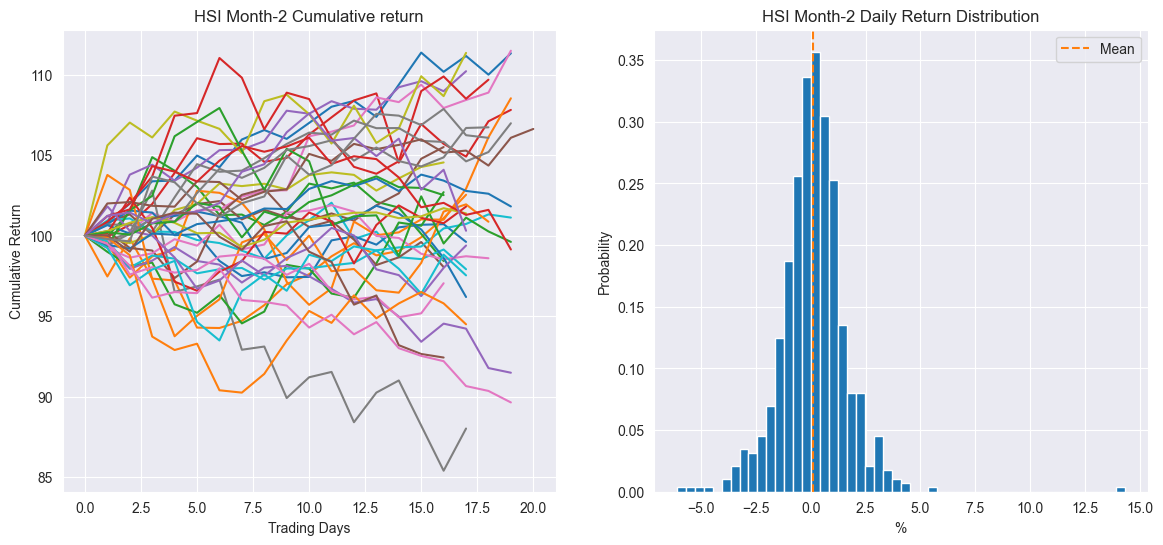

Mean: 0.11386168831829266, Std: 1.5100084335065624
Skewness: 0.979692681698691, Kurtosis: 11.751919029733997
Jarque-Bera test p-value: 0.0
p_value < 0.05, the distribution is likely not normal


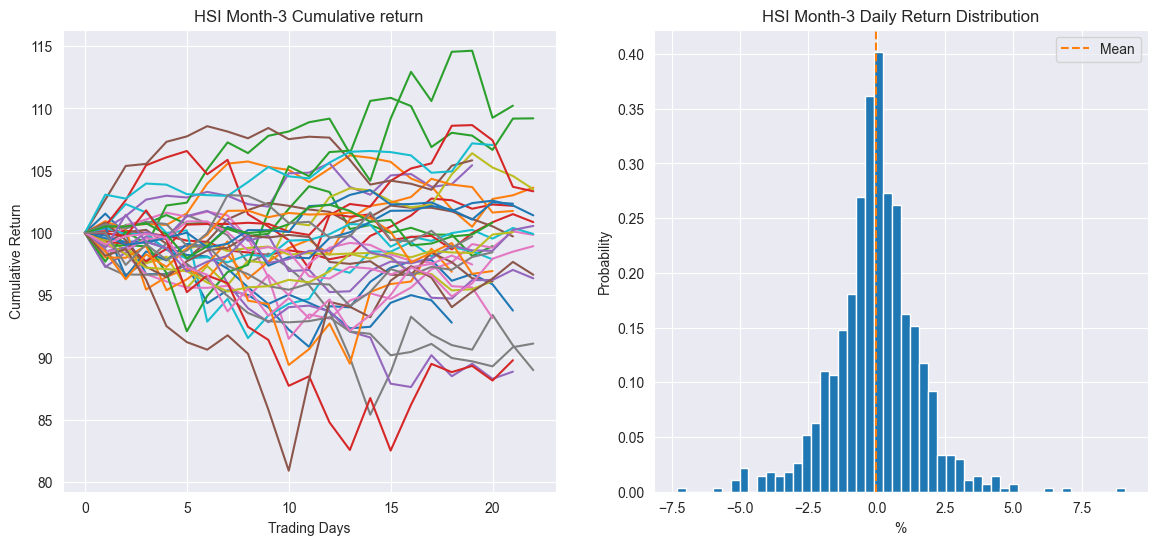

Mean: -0.037017027084815975, Std: 1.5966392436914212
Skewness: 0.04565492524469037, Kurtosis: 3.228488480561005
Jarque-Bera test p-value: 1.7084636201954818e-77
p_value < 0.05, the distribution is likely not normal


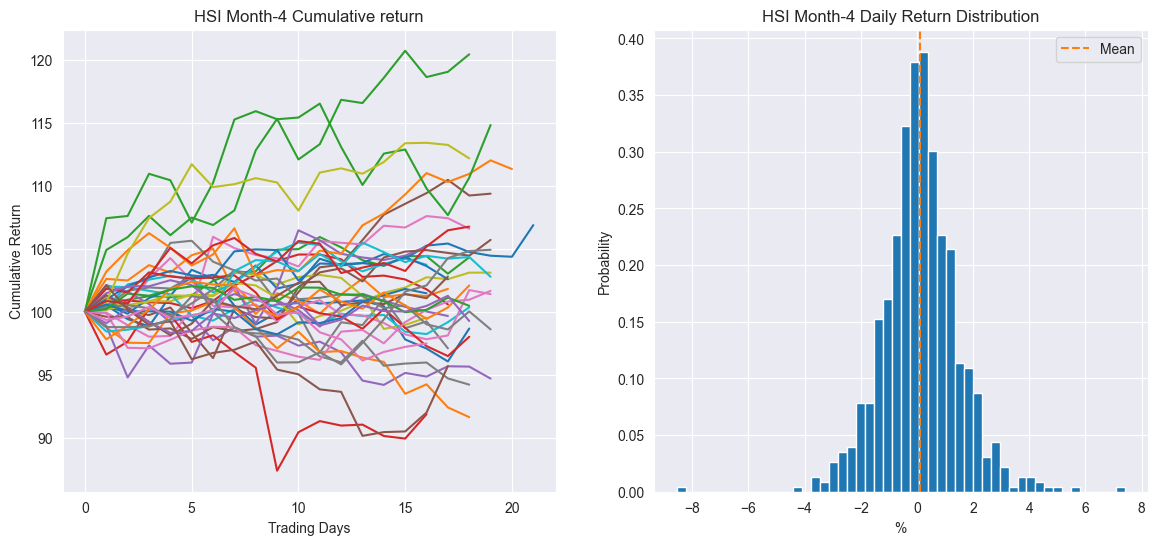

Mean: 0.12301796582549095, Std: 1.3894862819211165
Skewness: 0.0963741756286805, Kurtosis: 3.6639194472209713
Jarque-Bera test p-value: 1.4227017207725374e-86
p_value < 0.05, the distribution is likely not normal


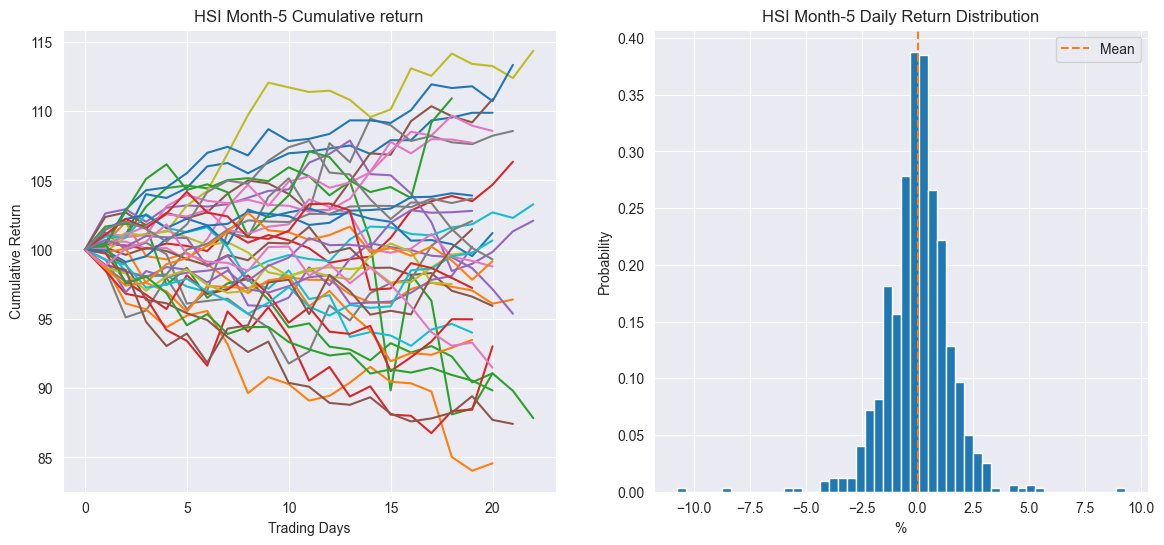

Mean: 0.01525064104578636, Std: 1.4503840672294763
Skewness: -0.45253499450720597, Kurtosis: 7.893399518069117
Jarque-Bera test p-value: 0.0
p_value < 0.05, the distribution is likely not normal


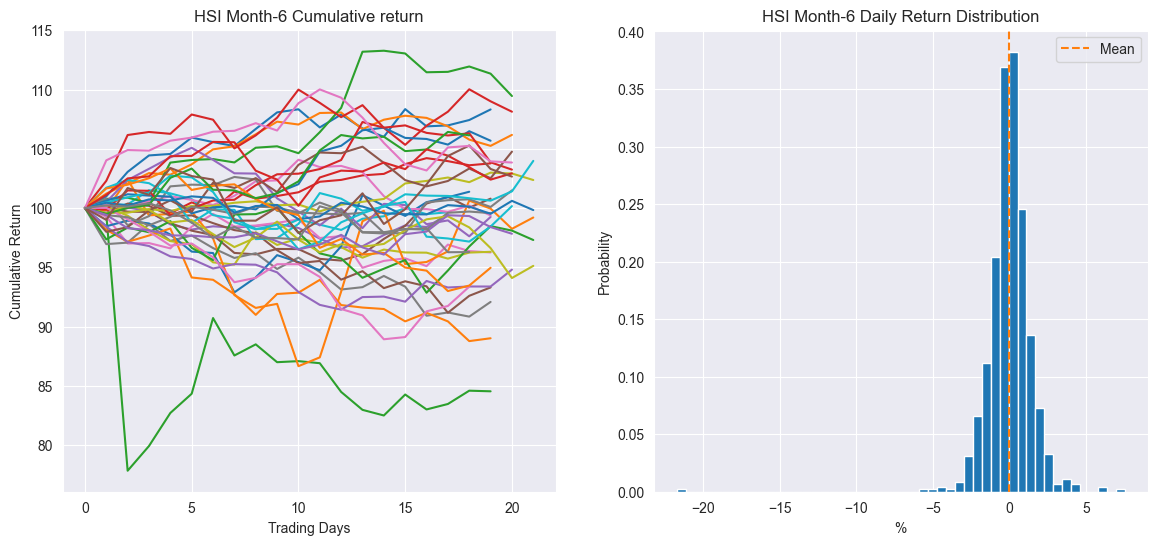

Mean: 0.006488170540418916, Std: 1.53986617528269
Skewness: -3.343731976484371, Kurtosis: 52.369131539252706
Jarque-Bera test p-value: 0.0
p_value < 0.05, the distribution is likely not normal


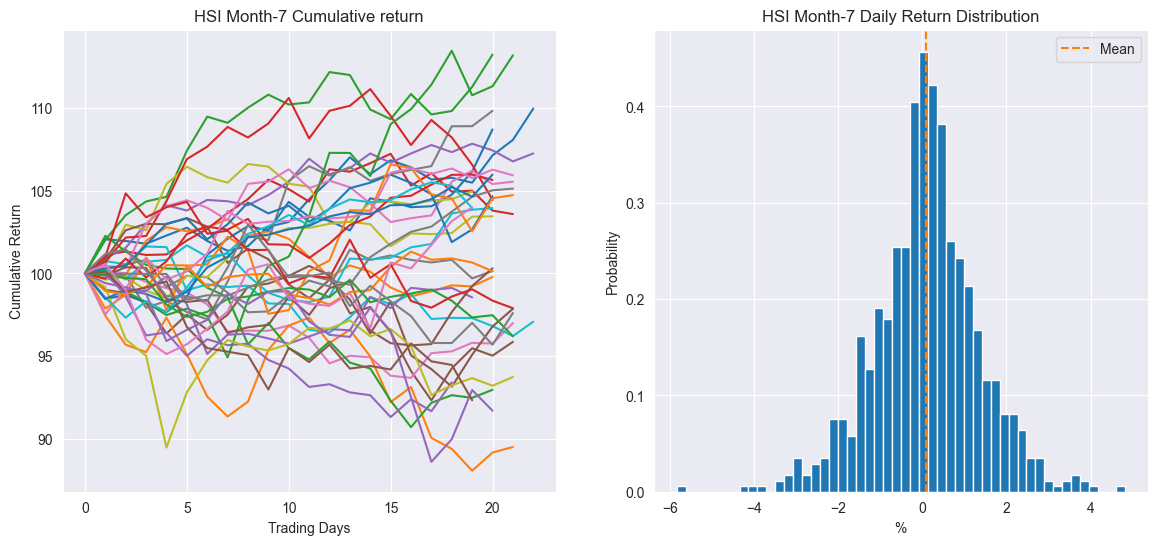

Mean: 0.09329328263905134, Std: 1.2524743203495756
Skewness: -0.12489724909463372, Kurtosis: 1.300440001523699
Jarque-Bera test p-value: 2.670805370351253e-13
p_value < 0.05, the distribution is likely not normal


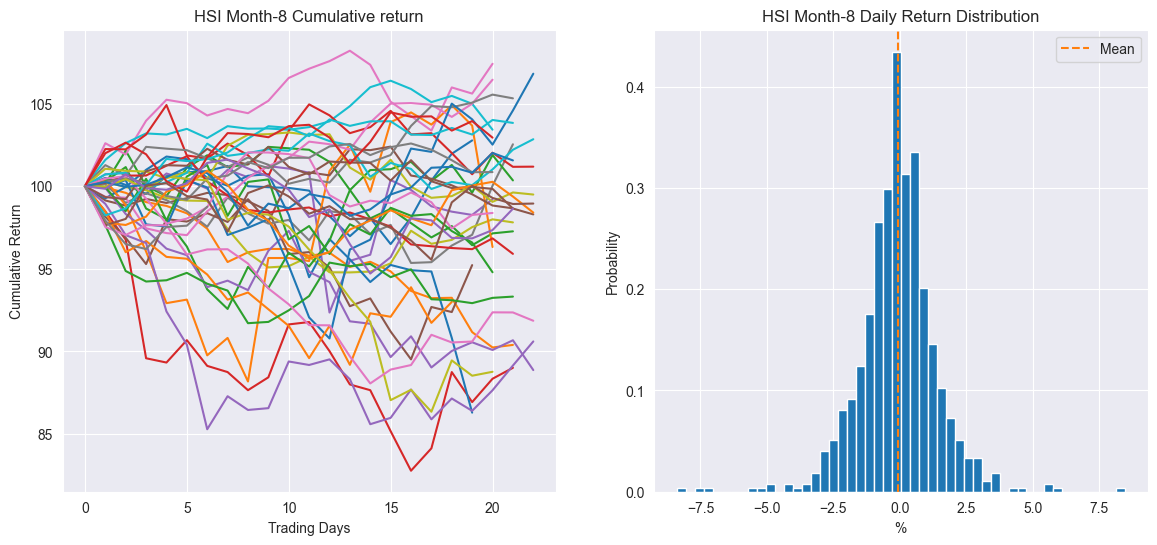

Mean: -0.07939482130436627, Std: 1.465542196988413
Skewness: -0.17413178850485286, Kurtosis: 4.898859159894483
Jarque-Bera test p-value: 3.0608753655376293e-175
p_value < 0.05, the distribution is likely not normal


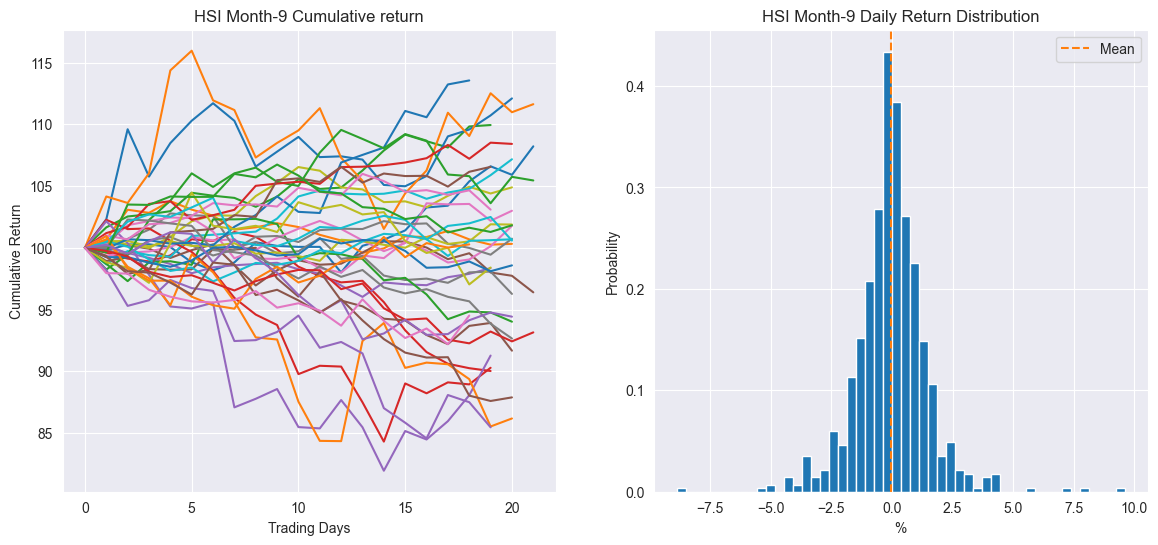

Mean: -0.03238855939626673, Std: 1.4921008487568694
Skewness: 0.30480654716130845, Kurtosis: 6.006244530921599
Jarque-Bera test p-value: 9.483461923327514e-250
p_value < 0.05, the distribution is likely not normal


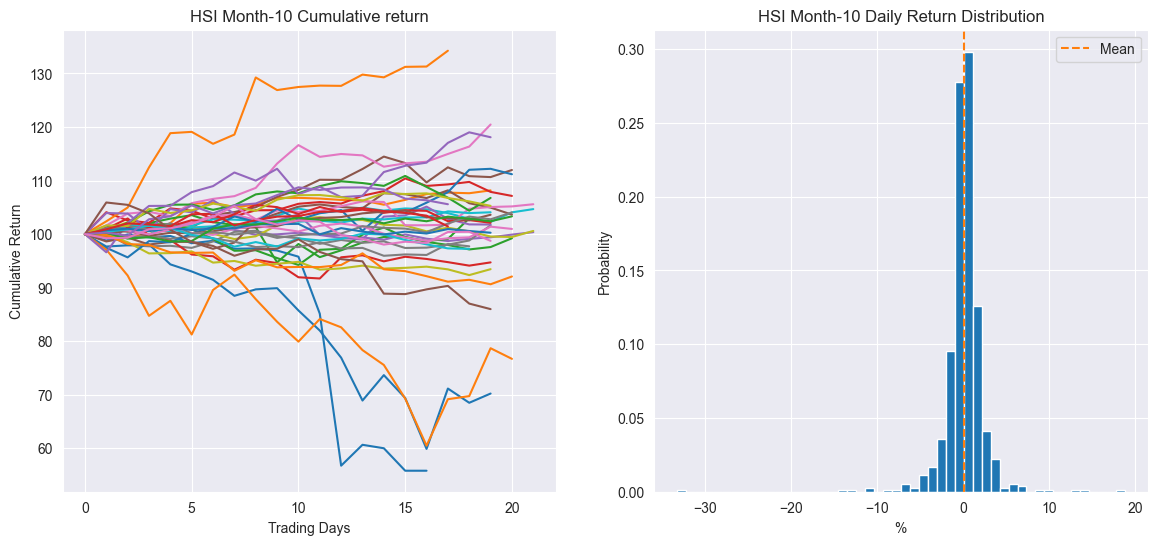

Mean: 0.037126584599227554, Std: 2.5387706684142506
Skewness: -2.668024012980209, Kurtosis: 48.62956780488292
Jarque-Bera test p-value: 0.0
p_value < 0.05, the distribution is likely not normal


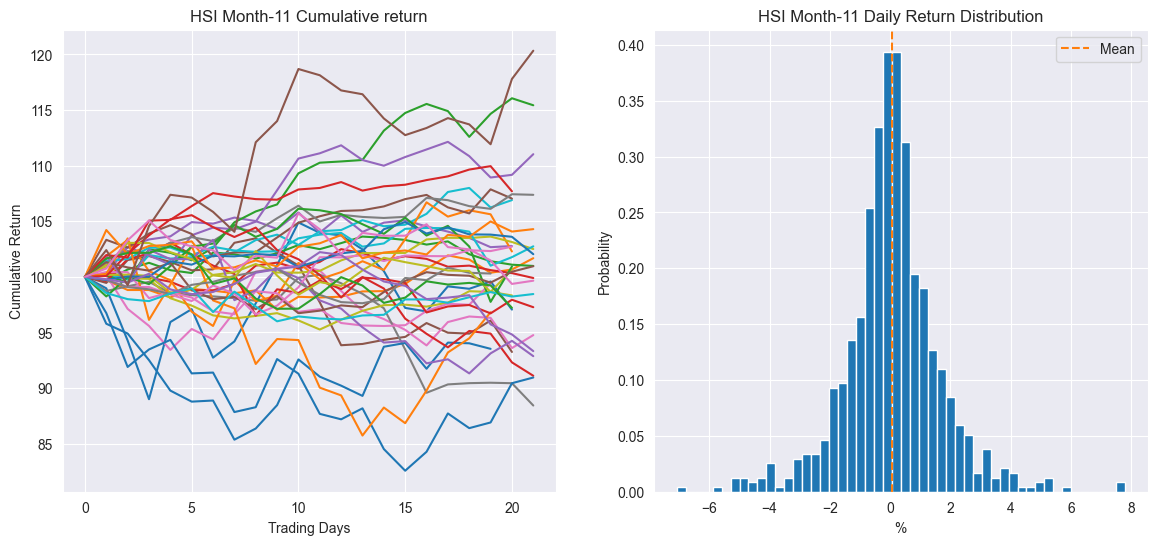

Mean: 0.06694153038195591, Std: 1.607268109557663
Skewness: 0.11414409175732801, Kurtosis: 2.933121745833434
Jarque-Bera test p-value: 8.17025789224332e-62
p_value < 0.05, the distribution is likely not normal


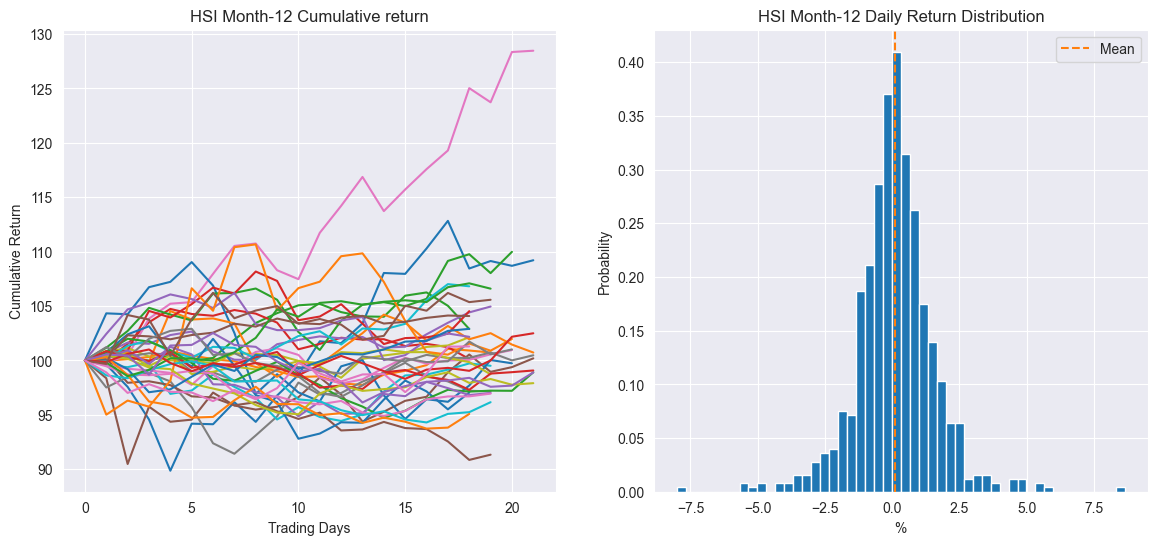

Mean: 0.10282943334810267, Std: 1.4696350487535543
Skewness: 0.03644736948595629, Kurtosis: 4.3844884783626
Jarque-Bera test p-value: 1.0493346001812707e-129
p_value < 0.05, the distribution is likely not normal


In [3]:
daily_ret_data = dict()

for _df in hsi.groupby(hsi.index.month):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    temp_df = _df[1]['Adj Close']
    temp_df.name = _df[0]
    returns = _df[1]['Return'] * 100
    daily_ret_data[_df[0]] = returns
    this_month_mean = returns.mean()
    this_month_std = returns.std(ddof=1)  # degree of freedom - 1 for better accuracy    
    
    for _df_1 in temp_df.groupby(temp_df.index.year):
        temp_df_1 = _df_1[1]
        temp_df_1 = temp_df_1 / temp_df_1.iloc[0]
        plt.plot(range(temp_df_1.shape[0]), (100 * temp_df_1).values.tolist())
        
    plt.title(f'HSI Month-{_df[0]} Cumulative return')
    plt.xlabel('Trading Days')
    plt.ylabel('Cumulative Return')
    
    plt.subplot(1, 2, 2)
    plt.hist(returns.values.tolist(), bins=50, density=True)
    plt.axvline(this_month_mean, label='Mean', linestyle='--', color=colours[1])
    plt.title(f'HSI Month-{_df[0]} Daily Return Distribution')
    plt.xlabel('%')
    plt.ylabel('Probability')
    plt.legend(loc='best')
    plt.show()
    
    # ---- test for normality ----
    x = returns
    print(f'Mean: {x.mean()}, Std: {x.std(ddof=1)}')
    print(f'Skewness: {x.skew()}, Kurtosis: {x.kurtosis()}')
    test_stats, p_value = stats.jarque_bera(x)
    print(f'Jarque-Bera test p-value: {p_value}')
    if p_value < 0.05:
        print('p_value < 0.05, the distribution is likely not normal')
    else:
        print('p_value >= 0.05, the distribution is likely to be normal')
    

Simulate Distribution Using Monte Carlo Methods

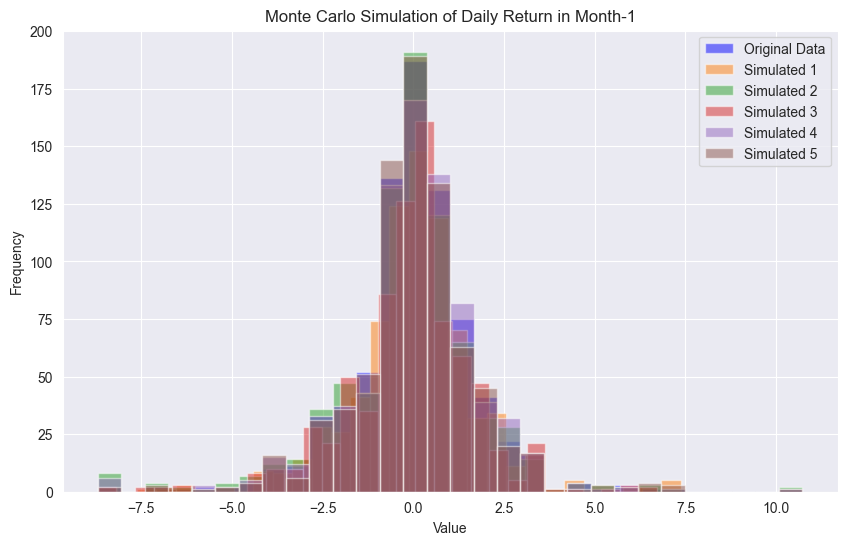

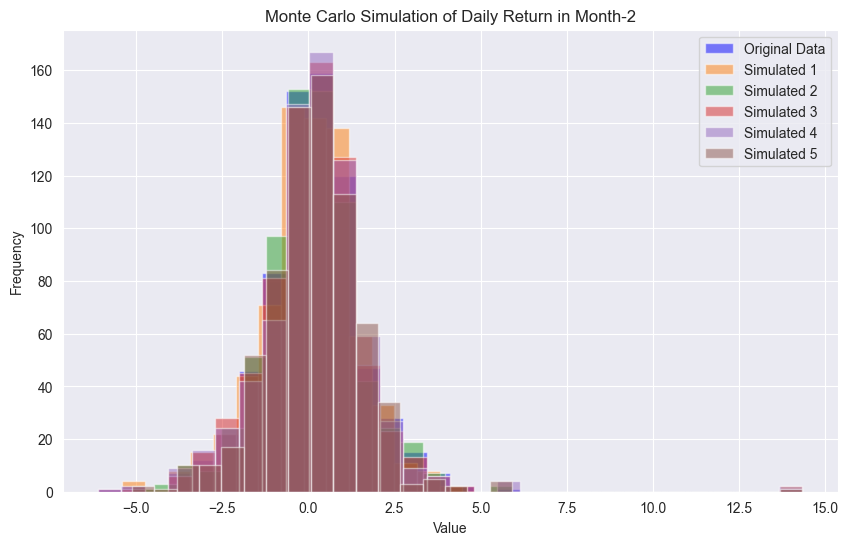

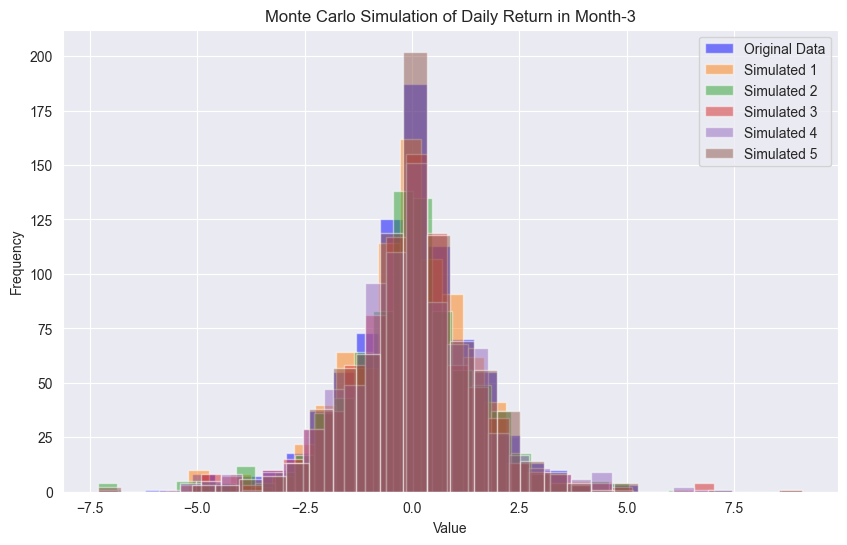

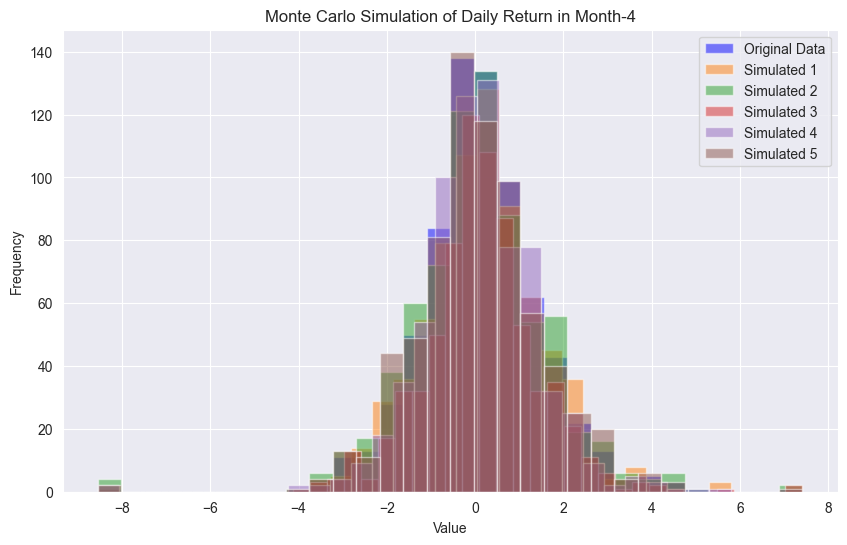

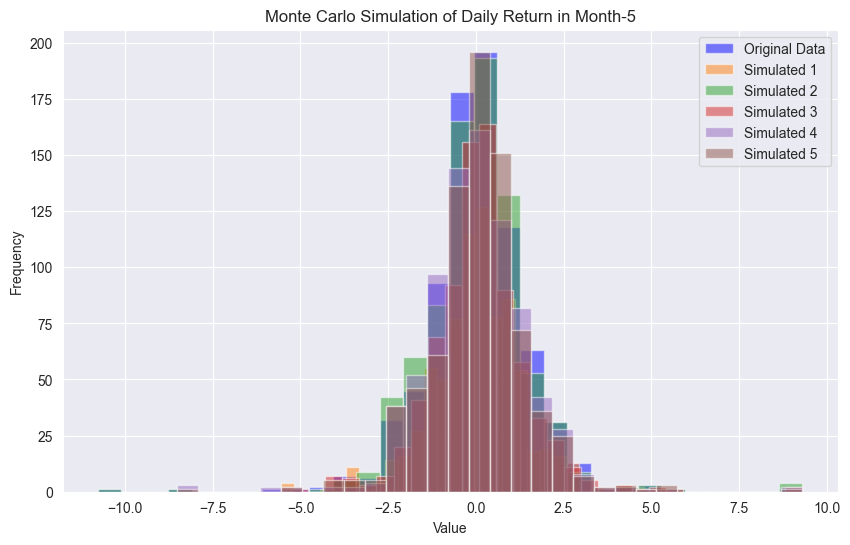

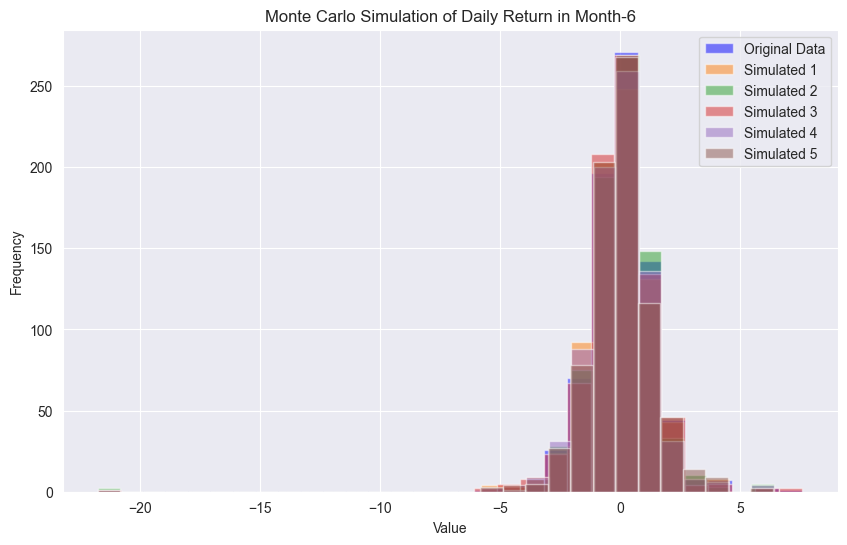

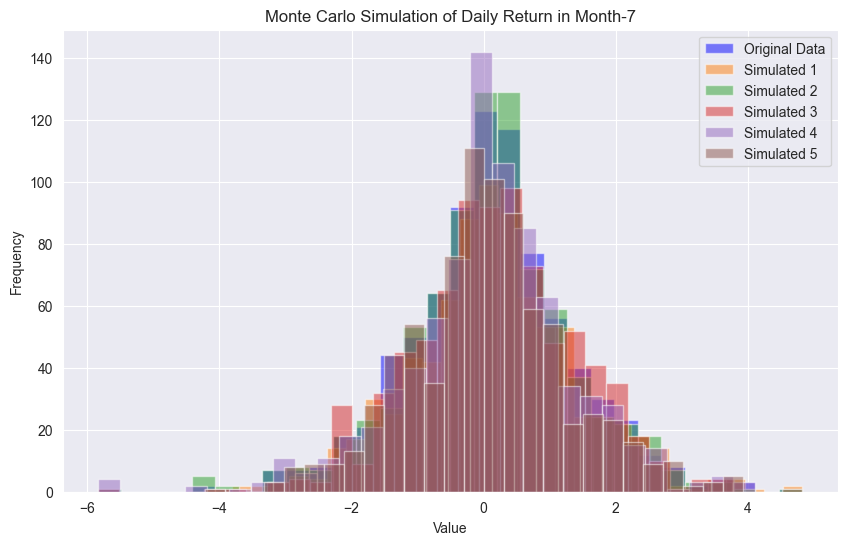

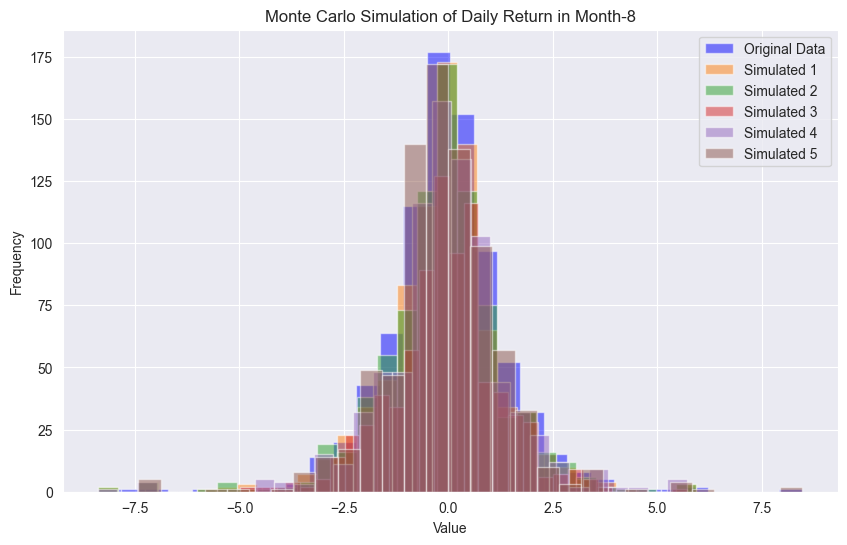

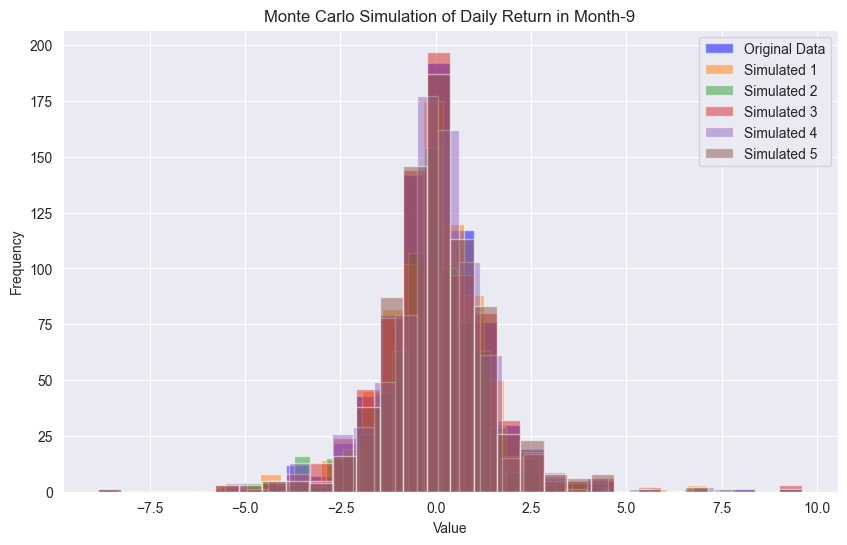

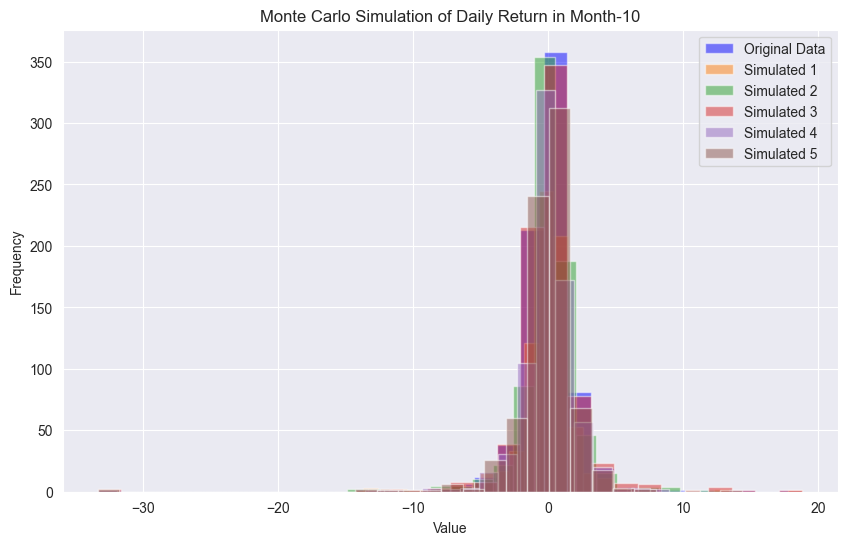

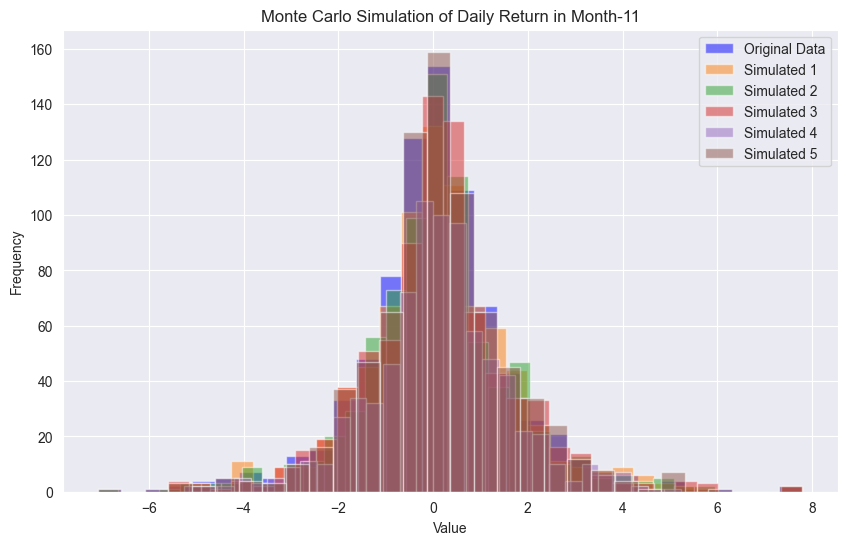

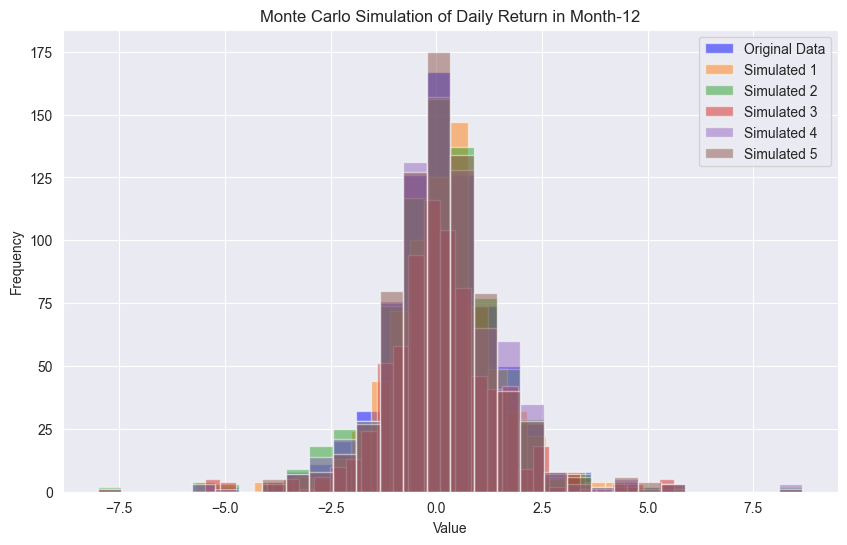

In [4]:
num_simulations = 1000
simulated_m_data = dict()
for key in daily_ret_data:
    simulated_datasets = []
    original_data = daily_ret_data[key]
    # Perform Monte Carlo simulation
    for _ in range(num_simulations):
        # Resample from the original data with replacement
        simulated_data = np.random.choice(original_data, size=len(original_data), replace=True)
        simulated_datasets.append(simulated_data)
    
    # Plot the original data and a few simulated datasets
    plt.figure(figsize=(10, 6))
    plt.hist(original_data, bins=30, alpha=0.5, label="Original Data", color="blue")
    for i in range(5):
        plt.hist(simulated_datasets[i], bins=30, alpha=0.5, label=f"Simulated {i+1}", color=f"C{i+1}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(f"Monte Carlo Simulation of Daily Return in Month-{key}")
    plt.legend()
    plt.show()
    
    simulated_m_data[key] = simulated_datasets

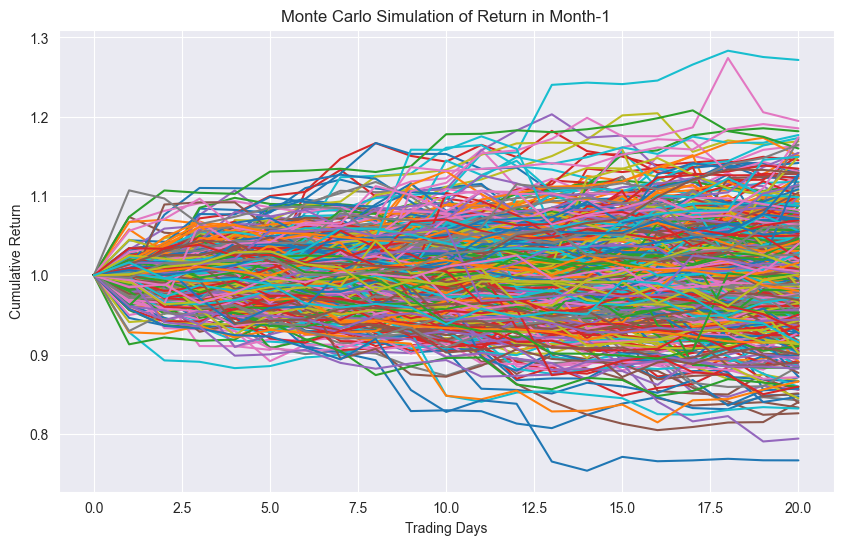

Mean: -0.42515301439125963, Std: 1.7588993041782561
Skewness: 1.0527464689459123, Kurtosis: 1.7391197172949386
Jarque-Bera test p-value: 0.13099649136047348
p_value >= 0.05, the distribution is likely to be normal


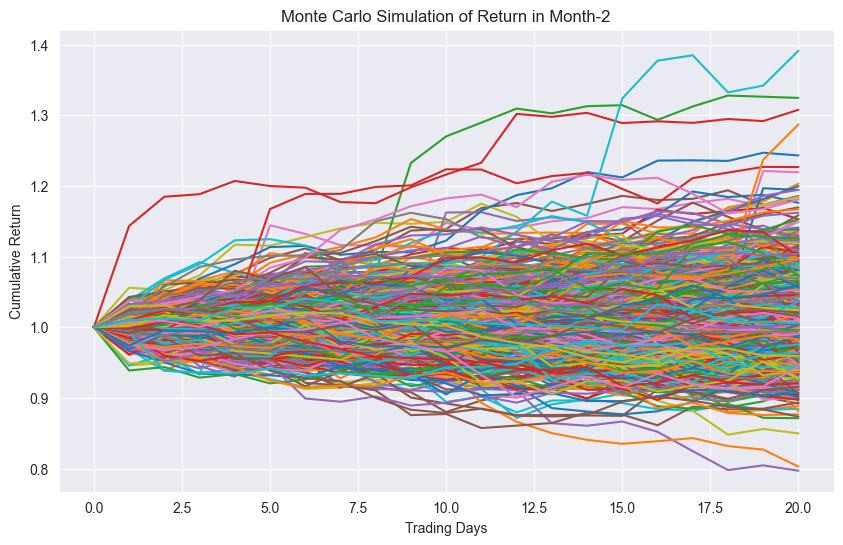

In [ ]:
num_simulations = 500
for key in daily_ret_data:
    original_data = daily_ret_data[key]
    # Perform Monte Carlo simulation
    plt.figure(figsize=(10, 6))
    m_daily_returns = []
    
    for _ in range(num_simulations):
        # Resample from the original data with replacement
        trading_days = 20
        simulated_data = np.random.choice(original_data, size=trading_days, replace=True)
        simulated_index = [1]
        for i in range(trading_days):
            simulated_index.append(simulated_index[i] * (1 + simulated_data[i] / 100))
            
        plt.plot(simulated_index)
        m_daily_returns = simulated_data
        
    plt.xlabel("Trading Days")
    plt.ylabel("Cumulative Return")
    plt.title(f"Monte Carlo Simulation of Return in Month-{key}")
    plt.show()
    
    # ---- test for normality ----
    x = pd.Series(m_daily_returns)
    print(f'Mean: {x.mean()}, Std: {x.std(ddof=1)}')
    print(f'Skewness: {x.skew()}, Kurtosis: {x.kurtosis()}')
    test_stats, p_value = stats.jarque_bera(x)
    print(f'Jarque-Bera test p-value: {p_value}')
    if p_value < 0.05:
        print('p_value < 0.05, the distribution is likely not normal')
    else:
        print('p_value >= 0.05, the distribution is likely to be normal')

Conclusion: 
- Cannot assume daily returns are random
- Present day's return is affected by previous days' returns